In [2]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp,odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def solve_carreau(U0,Omega,N,Nt,dy,dt,H,v,eta_0,eta_inf,n):
    # Matrix each row will be valueof dui/dt at time t from 0 to T
    # u[i, j] is u(i*dy, j*dt)
    u = np.zeros((N, Nt)) # 0 to N-1
    #boundary conditions
    #u[:,0] = initial_u_t0(Omega, v, 0)
    u[:,0] = initial_0(Omega, v, 0) # set everything to 0
    for j in range(0, Nt):
        u[0, j] = boundary_condition_oci(U0, Omega, j*dt)
        #u[0, j] = boundary_condition_con(U0, Omega, j*dt)
        u[N-1, j] = u[0, j]
    #all interior
    for j in range(0, Nt - 1):
        for i in range(1, N-1):
            d2u = (u[i+1,j] + u[i-1,j]-2*u[i,j])/dy**2
            du =(u[i+1,j] - u[i,j])/dy
            v =(1 + du ** 2)**((n - 1)/2)
            dvdt = (n-1) * (1 + du ** 2) **((n-3)/2) * d2u

            u[i,j+1] = eta_inf * dt * j + (eta_0 - eta_inf) * ((v * d2u + dvdt * du) * dt + u[i, j])
            #u[N-1-i,j+1] = u[i,j+1]
    
    y = np.linspace(0,H,N)
    return y,u

In [4]:
def initial_u_t0(Omega, v, t):
    #λ =np.sqrt(Omega*(complex(0,1)-Omega*t))/(t+1+Omega*t*complex(0,1))
    λ = complex(1,1)*np.sqrt(Omega/(2*v))
    A = U0
    B = U0*(np.cosh(λ*H)-1)/np.sinh(λ*H)
    y = np.linspace(0, H, N)
    return np.real((A*np.cosh(λ*y) - B*np.sinh(λ*y))*np.exp([complex(0,Omega*t)]))

In [5]:
def initial_0(Omega, v, t):
    return 0


In [6]:
v = 1       
N = 100
H = 10
T = 2 * np.pi
Nt = 4001
U0 = 1
Omega = 1
dy = H / (N - 1)
dt = T / (Nt - 1)
eta_0 = 0.1600
eta_inf = 0.0035
n =  1

def boundary_condition_oci(U0, Omega, t):
    return U0 * np.sin(Omega * t)
def boundary_condition_con(U0, Omega, t):
    return U0

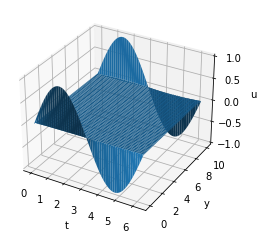

In [7]:
y, u = solve_carreau(U0,Omega,N,Nt,dy,dt,H,v,eta_0,eta_inf,n)
#sol = solve_ivp(rhs, (0, T), u_initial, t_eval = np.linspace(0, T, Nt), args = (u,v,dy,U0,Omega))
#for i in range(4):
#    plt.plot(u[:, i*1000] ,y)
'''- initial_u_t0(Omega,v,i*np.pi/4)'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
yy = np.linspace(0,H,N)
tt = np.linspace(0,T,Nt)
y_list, t_list = np.meshgrid(yy,tt)
ax.plot_surface(t_list.T, y_list.T, u)
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

0.026063580706832165


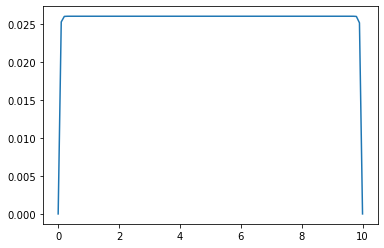

In [77]:
plt.plot(y, u[:,4000])
print(u[5,4000])